<a href="https://colab.research.google.com/github/EumGitae/Machine-Learning/blob/main/14week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

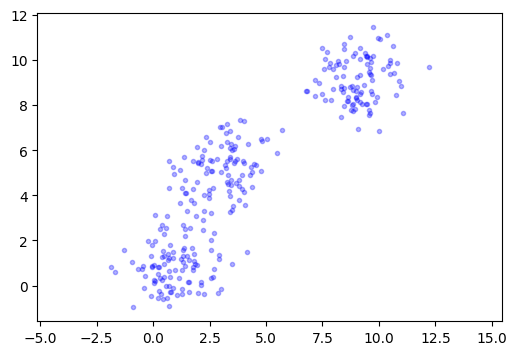

In [ ]:
# data generation
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 100)  # (mean, sigma, # of samples)
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 100)
G2 = np.random.multivariate_normal([9, 9], np.eye(2), 100)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)

plt.figure(figsize = (6, 4))
plt.plot(X[:,0], X[:,1], 'b.', alpha = 0.3)
plt.axis('equal')
plt.show()

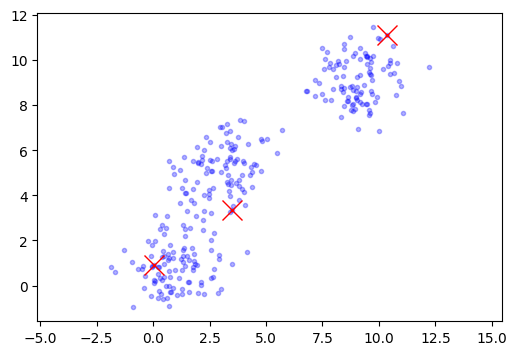

In [ ]:
k = 3
m = X.shape[0]

mu = X[np.random.randint(0,m,k),:]
pre_mu = mu.copy()

plt.figure(figsize = (6, 4))
plt.plot(X[:,0], X[:,1], 'b.', alpha = 0.3)
plt.plot(mu[:,0], mu[:,1], 'rx', markersize = 15)
plt.axis('equal')
plt.show()

In [ ]:
y = np.empty([m,1])

for n_iter in range(500):
  for i in range(m):
    d0 = np.linalg.norm(X[i,:] - mu[0,:],2)
    d1 = np.linalg.norm(X[i,:] - mu[1,:],2)
    d2 = np.linalg.norm(X[i,:] - mu[2,:],2)

    y[i] = np.argmin([d0, d1, d2])

  err = 0
  for i in range(k):
    mu[i,:] = np.mean(X[np.where(y == i)[0],:], axis = 0)
    err += np.linalg.norm(mu[i,:] - pre_mu[i,:],2)

  pre_mu = mu.copy()

  if err < 1e-10:
    print("lteration:", n_iter)
    break

lteration: 2


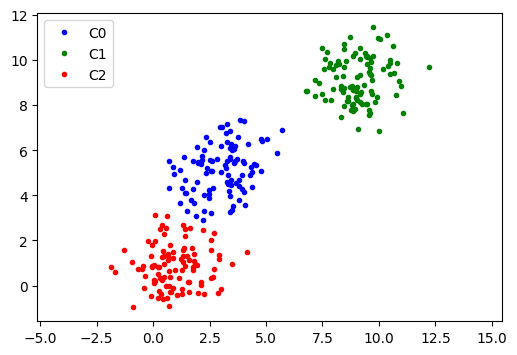

In [ ]:
X0 = X[np.where(y==0)[0]]
X1 = X[np.where(y==1)[0]]
X2 = X[np.where(y==2)[0]]

plt.figure(figsize = (6, 4))
plt.plot(X0[:,0], X0[:,1], 'b.', label = 'C0')
plt.plot(X1[:,0], X1[:,1], 'g.', label = 'C1')
plt.plot(X2[:,0], X2[:,1], 'r.', label = 'C2')
plt.axis('equal')
plt.legend()
plt.show()

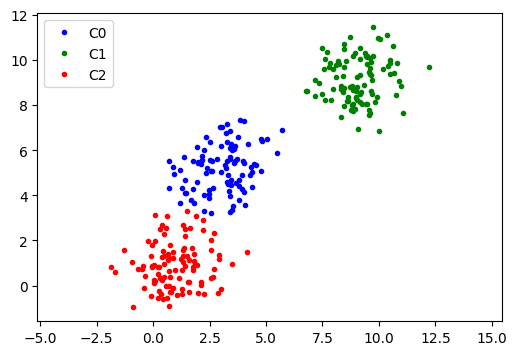

In [ ]:
# use kmeans from the scikit-learn module

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(np.array(X))

plt.figure(figsize = (6, 4))
plt.plot(X[kmeans.labels_ == 0,0],X[kmeans.labels_ == 0,1], 'b.', label = 'C0')
plt.plot(X[kmeans.labels_ == 1,0],X[kmeans.labels_ == 1,1], 'g.', label = 'C1')
plt.plot(X[kmeans.labels_ == 2,0],X[kmeans.labels_ == 2,1], 'r.', label = 'C2')
plt.axis('equal')
plt.legend()
plt.show()

In [ ]:
# data generation
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 100)
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 100)
G2 = np.random.multivariate_normal([9, 9], np.eye(2), 100)

X = np.vstack([G0, G1, G2])

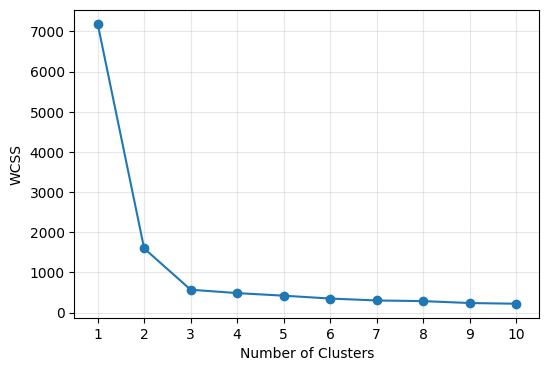

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0).fit(X)
    wcss.append(abs(kmeans.inertia_))

plt.figure(figsize = (6, 4))
plt.plot(range(1,11), wcss, 'o-')
plt.plot(2, wcss[2], 'r-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(11))
plt.xlim([0.5, 10.5])
plt.grid(alpha = 0.3)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


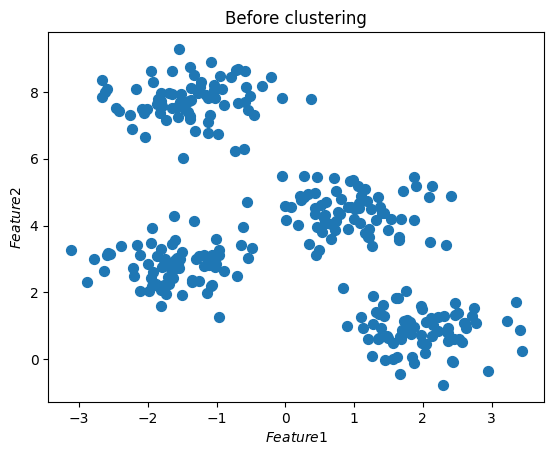

In [ ]:
# Data read
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Reading the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kmean_dataset.csv')
# Extracting X
X = df[['Feature1', 'Feature2']].values    # X.shape(300, 2)
N, num_features = X.shape[0], X.shape[1]
K = 4    # Number of the cluster

plt.figure(0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Before clustering")
plt.xlabel(r'$Feature1$')
plt.ylabel(r'$Feature2$')
plt.show()

In [ ]:
def initialize_centroids(K, num_features):
    return np.zeros((K, num_features))

In [ ]:
def update_cluster(X, centroids):
    # Assign clusters
    r = np.zeros((N,K)) # Initialize r as a zero matrix  (300, 4)
    distances = np.zeros((N,K))
    for i in range(N):
        for k in range(K):
            distances[i,k] = np.sum((X[i] - centroids[k])**2)
    nearest_centroid = np.argmin(distances, axis=1)
    # Assign 1 to the nearest cluster in r
    r[np.arange(N), nearest_centroid] = 1
    return r, nearest_centroid, distances

In [ ]:
def update_centroid(X, r, centroids):
    new_centroids = np.zeros((K, num_features))
    for k in range(K):
        # Check if the cluster has any points assigned
        if np.sum(r[:, k]) > 0:
            # Update centroid
            for i in range(N):
                new_centroids[k] += r[i,k]*X[i]
            new_centroids[k] /= np.sum(r[:,k])
        else:
            new_centroids[k] = centroids[k]
    return new_centroids

In [ ]:
def kmeans(X, K, max_iters=100, epsilon=1e-6):
    N = X.shape[0]
    # Initialize the centroids to zero
    centroids = initialize_centroids(K, num_features)
    J = 1e6 # Arbitrary large number
    for iter in range(max_iters):
        r, nearest_centroid, distances = update_cluster(X,centroids)
        new_centroids = update_centroid(X, r, centroids)
        new_J = 0
        for i in range(N):
            for k in range(K):
                new_J += r[i,k]*distances[i,k]
        if np.abs((new_J - J)/new_J) < epsilon:
            break
        centroids = new_centroids
        J = new_J
        print('Iter :', iter, 'J : ', J)
    return nearest_centroid, centroids

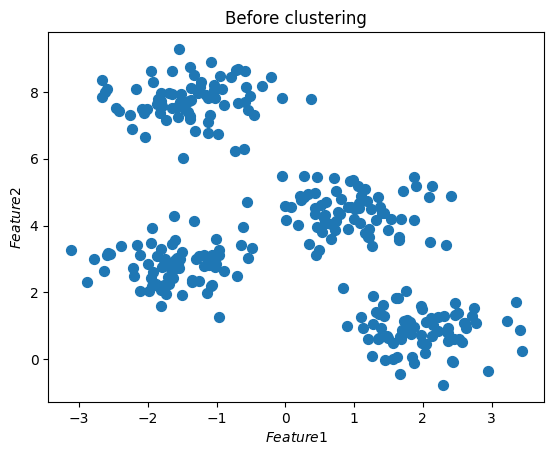

In [ ]:
# Data read
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Reading the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kmean_dataset.csv')
# Extracting X
X = df[['Feature1', 'Feature2']].values    # X.shape(300, 2)
N, num_features = X.shape[0], X.shape[1]
K = 4    # Number of the cluster

plt.figure(0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Before clustering")
plt.xlabel(r'$Feature1$')
plt.ylabel(r'$Feature2$')
plt.show()

Iter : 0 J :  7535.230383923918
Iter : 1 J :  2134.73695588128
Iter : 2 J :  1400.4953466037564
Iter : 3 J :  981.4741852368517
Iter : 4 J :  790.8748934890929
Iter : 5 J :  767.9837571382335
Iter : 6 J :  731.913135136874
Iter : 7 J :  605.0565128214072
Iter : 8 J :  309.1035815713306
Iter : 9 J :  213.9549876183944
Iter : 10 J :  212.07066285197715
Iter : 11 J :  212.00599620284646


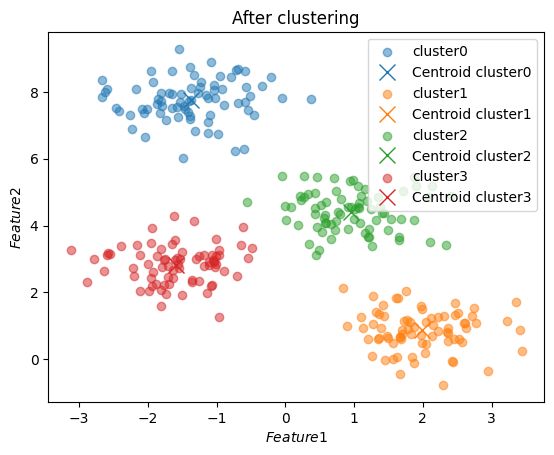

In [ ]:
def initialize_centroids(K, num_features):
    return np.zeros((K, num_features))

def update_cluster(X, centroids):
    # Assign clusters
    r = np.zeros((N,K)) # Initialize r as a zero matrix  (300, 4)
    distances = np.zeros((N,K))
    for i in range(N):
        for k in range(K):
            distances[i,k] = np.sum((X[i] - centroids[k])**2)
    nearest_centroid = np.argmin(distances, axis=1)
    # Assign 1 to the nearest cluster in r
    r[np.arange(N), nearest_centroid] = 1
    return r, nearest_centroid, distances

def update_centroid(X, r, centroids):
    new_centroids = np.zeros((K, num_features))
    for k in range(K):
        # Check if the cluster has any points assigned
        if np.sum(r[:, k]) > 0:
            # Update centroid
            for i in range(N):
                new_centroids[k] += r[i,k]*X[i]
            new_centroids[k] /= np.sum(r[:,k])
        else:
            new_centroids[k] = centroids[k]
    return new_centroids

def kmeans(X, K, max_iters=100, epsilon=1e-6):
    N = X.shape[0]
    # Initialize the centroids to zero
    centroids = initialize_centroids(K, num_features)
    J = 1e6 # Arbitrary large number
    for iter in range(max_iters):
        r, nearest_centroid, distances = update_cluster(X,centroids)
        new_centroids = update_centroid(X, r, centroids)
        new_J = 0
        for i in range(N):
            for k in range(K):
                new_J += r[i,k]*distances[i,k]
        if np.abs((new_J - J)/new_J) < epsilon:
            break
        centroids = new_centroids
        J = new_J
        print('Iter :', iter, 'J : ', J)
    return nearest_centroid, centroids

nearest_centroid, centroids = kmeans(X, K)

plt.figure(1)
for i in range(K):
    plt.scatter(X[nearest_centroid == i, 0], X[nearest_centroid == i, 1], alpha = 0.5, label=f'cluster{i}')
    plt.plot(centroids[i, 0], centroids[i, 1], 'x', markersize=12, label=f'Centroid cluster{i}')
plt.legend()
plt.title("After clustering")
plt.xlabel(r'$Feature1$')
plt.ylabel(r'$Feature2$')
plt.show()


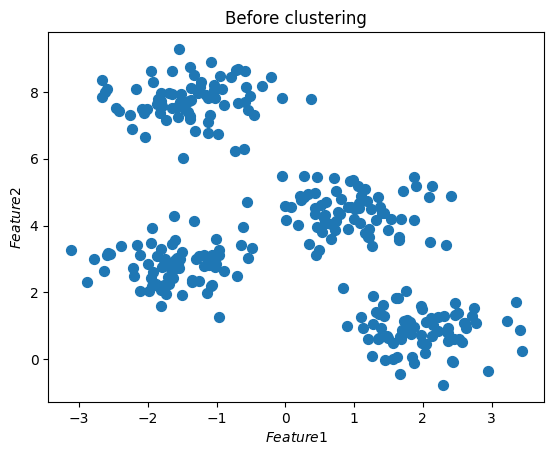

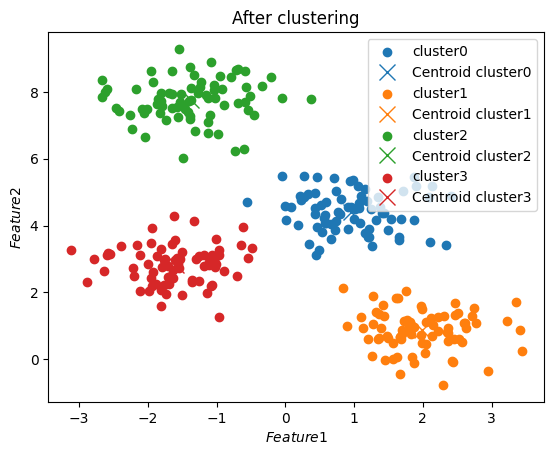

In [ ]:
# K-means - scikit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Reading the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kmean_dataset.csv')
# Extracting X
X = df[['Feature1', 'Feature2']].values
N, num_features = X.shape[0], X.shape[1]
K = 4

# Using scikit-learn's KMeans
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(X)

# Getting the cluster assignments and centroids
nearest_centroid = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting the clusters
# Visualize the Data
plt.figure(0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Before clustering")
plt.xlabel(r'$Feature1$')
plt.ylabel(r'$Feature2$')
plt.show()

plt.figure(1)
for i in range(K):
    plt.scatter(X[nearest_centroid == i, 0], X[nearest_centroid == i, 1], label=f'cluster{i}')
    plt.plot(centroids[i, 0], centroids[i, 1], 'x', markersize=12, label=f'Centroid cluster{i}')
plt.legend()
plt.title("After clustering")
plt.xlabel(r'$Feature1$')
plt.ylabel(r'$Feature2$')
plt.show()

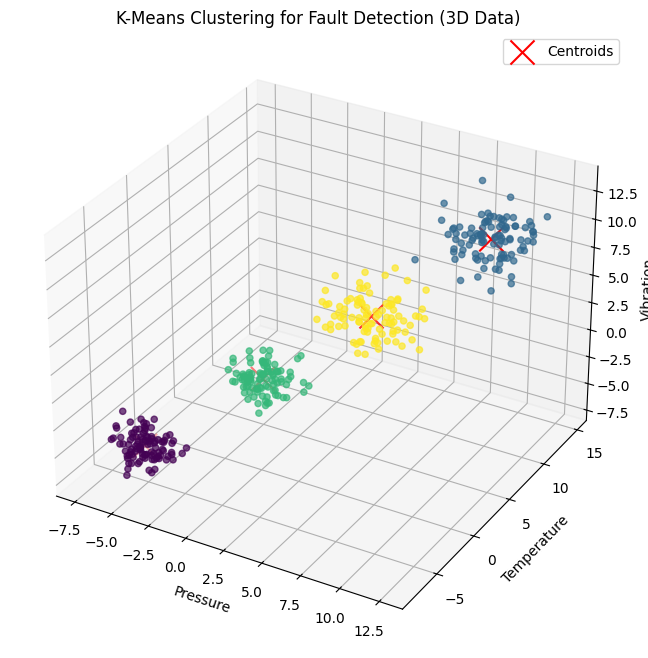

In [ ]:
# 3-D K-means clustering
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reading the data from the CSV file
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/kmean_3features_data.csv'
df_read = pd.read_csv(csv_file_path)
X = df_read[['Pressure', 'Temperature','Vibration']].values

# Applying KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Plotting the results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data colored by cluster label
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.7)

# Plotting the centroids
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='x', label='Centroids')

ax.set_title('K-Means Clustering for Fault Detection (3D Data)')
ax.set_xlabel('Pressure')
ax.set_ylabel('Temperature')
ax.set_zlabel('Vibration')
ax.legend()

plt.show()